# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

### Step 1.1: Load Data

In [1]:
# Load pickled data
import pickle

training_file = 'lab 2 data/train.p'
testing_file = 'lab 2 data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print('Done')

Done


### Step 1.2: Summarize dataset

In [2]:
### To start off let's do a basic data summary.

# number of training examples
n_train = len(X_train)

# number of testing examples
n_test = len(X_test)

# shape of an image?
image_shape = X_train[0].shape

# number of unique classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Step 1.3: Data exploration visualization

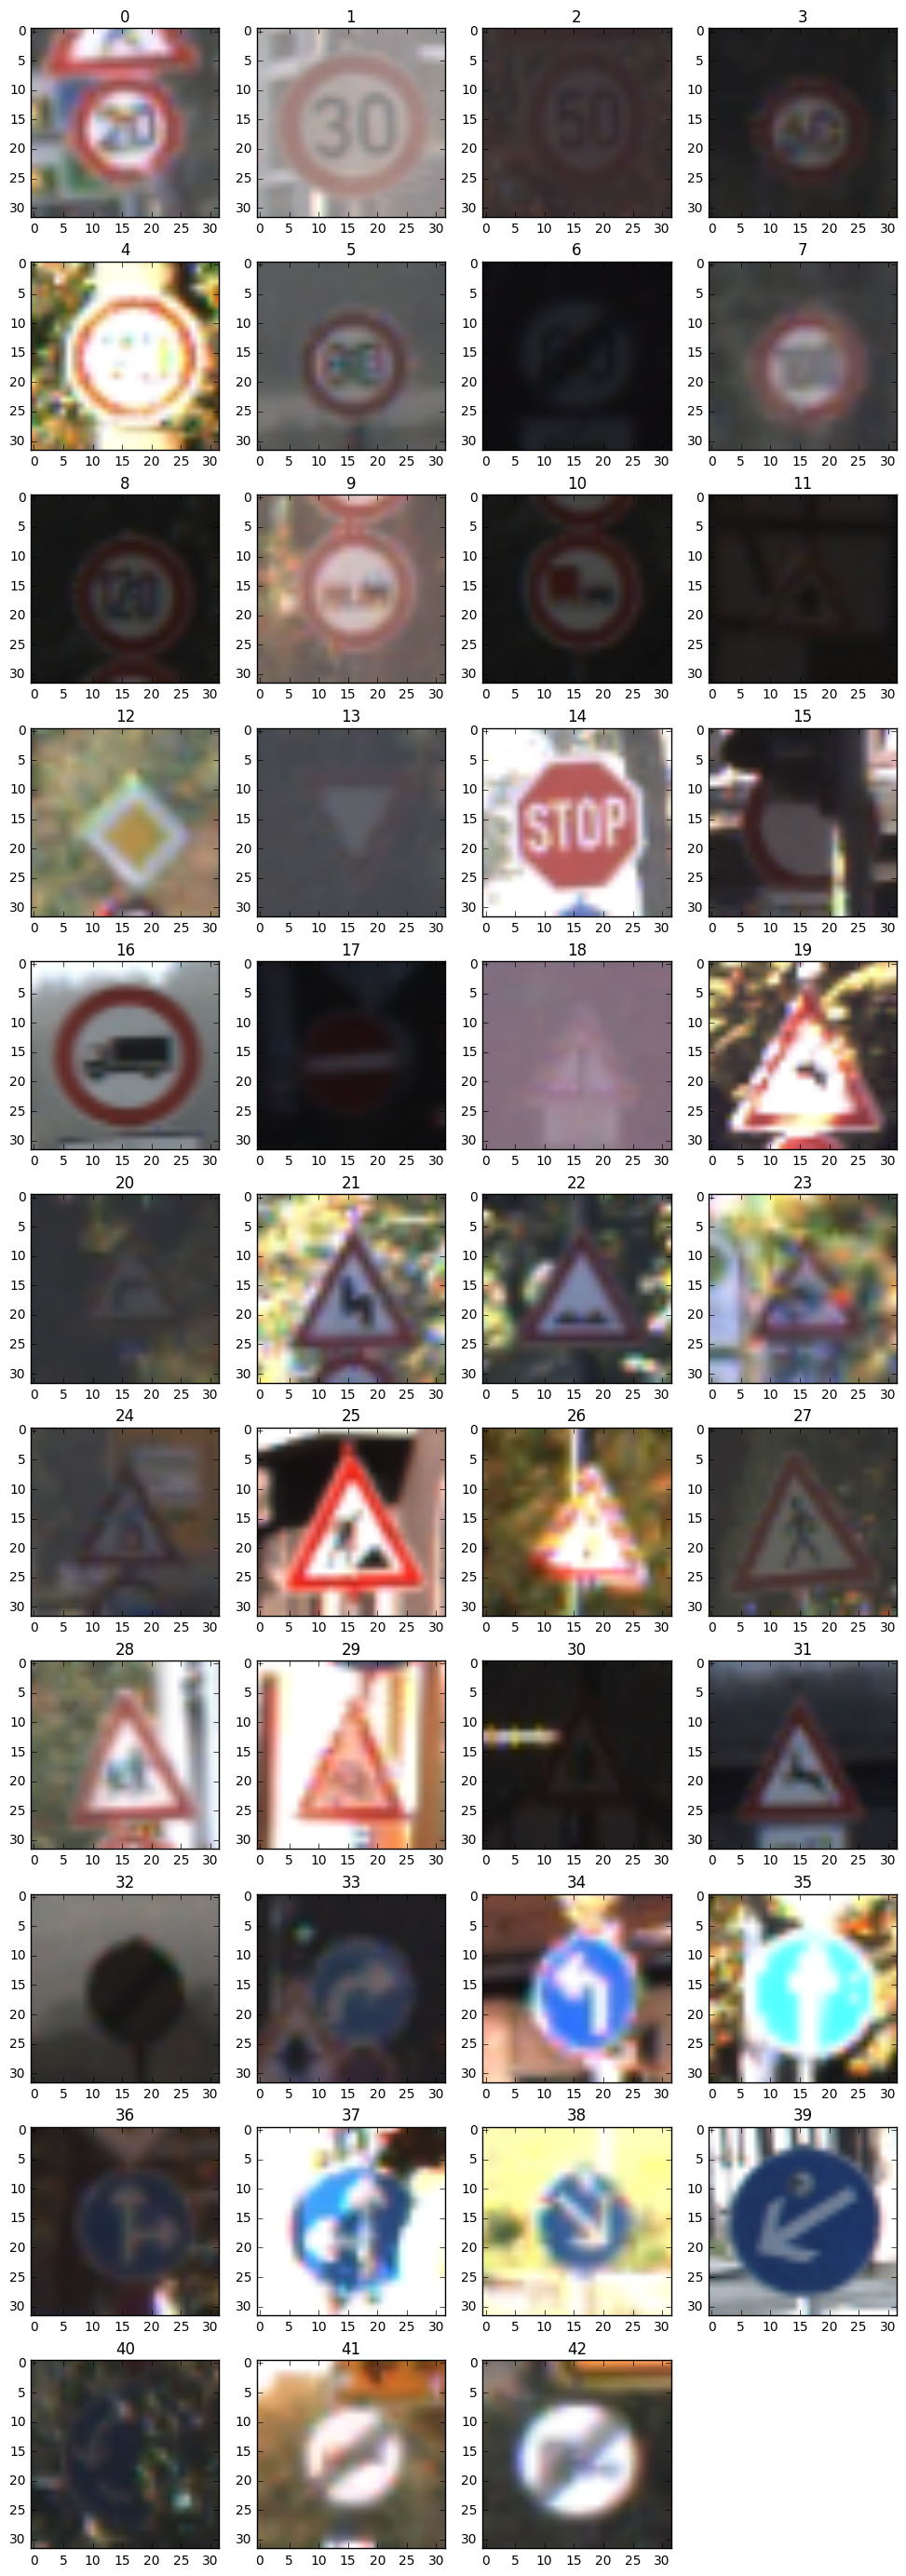

In [3]:
"""
Display of examples of images
Wait for image to load...
"""

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Extract all unique images for display
u, indices = np.unique(y_train, return_index=True)

# Display images in a 11 x 4 plot
fig = plt.figure(figsize=(12, 35))

for i in range(len(indices)):
    fig.add_subplot(11, 4, i+1)
    plt.imshow(X_train[indices[i]])
    plt.title(y_train[indices[i]])

plt.show()


### Step 1.4: Perform random jitter of images to even out datasets

Jittering was performed to to increase the classes with fewer number of images. Plot of final number was images for each class is show below.

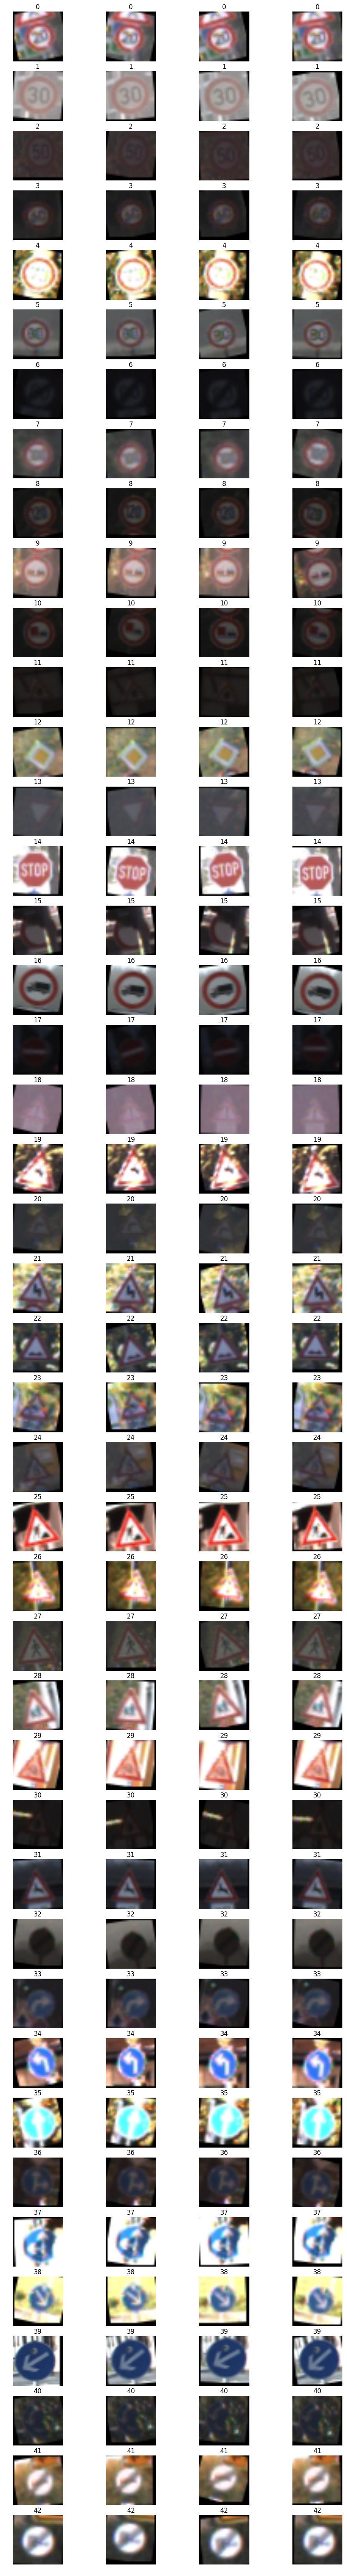

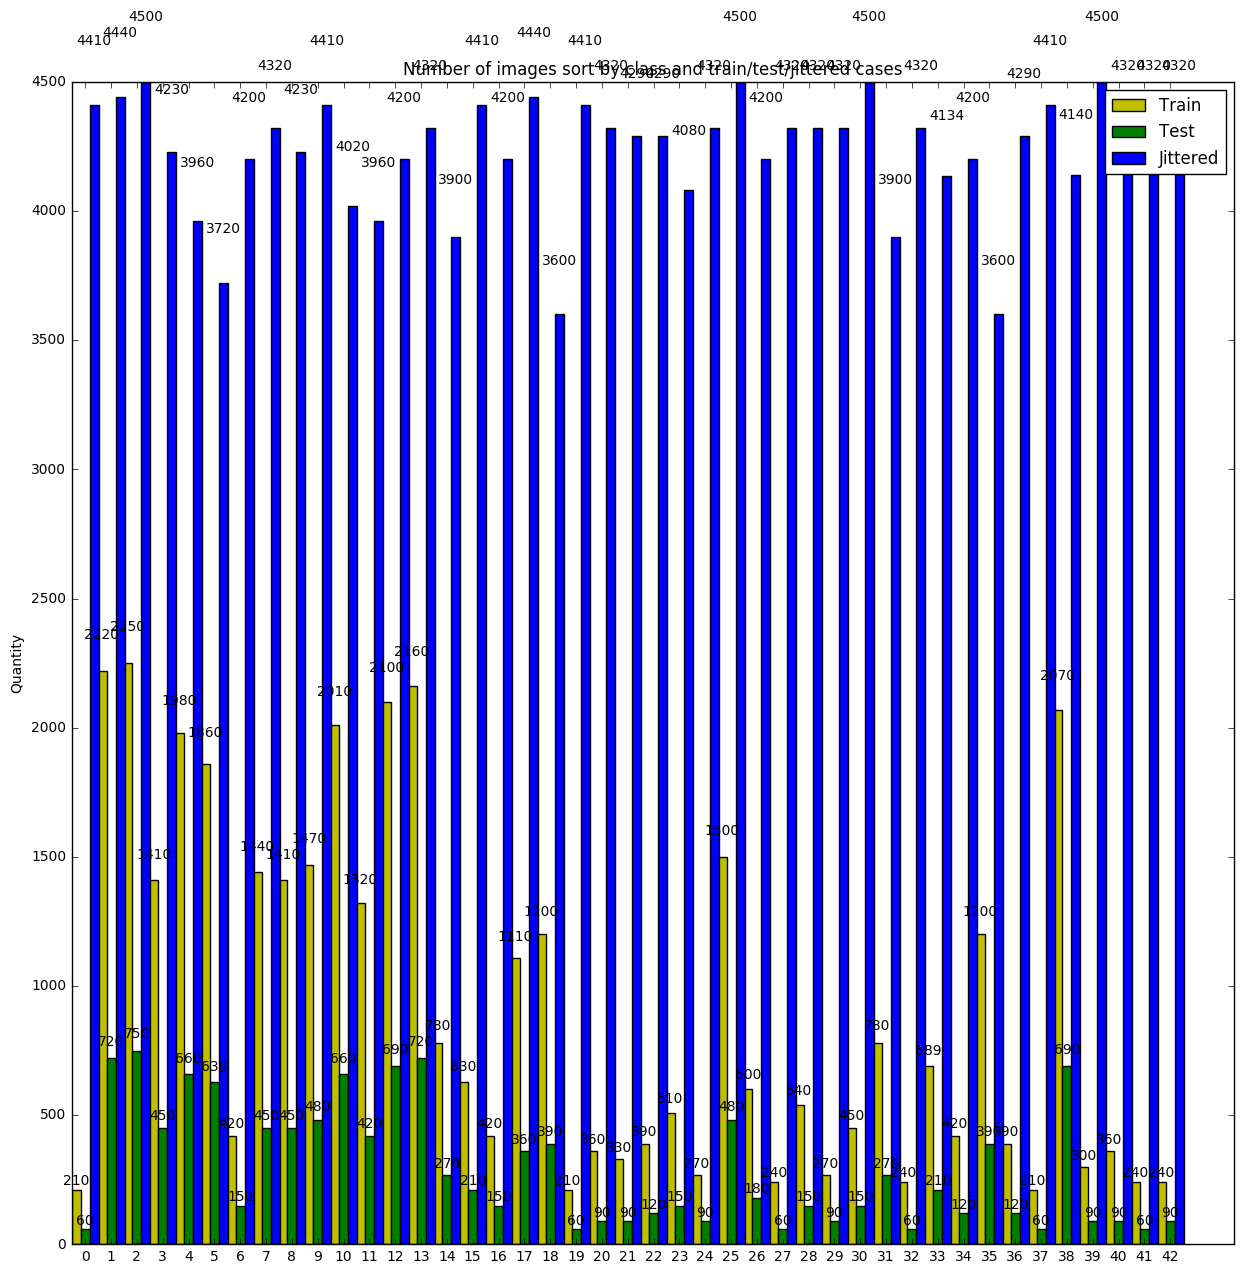

Done


In [4]:
import cv2

# Function for transforming images
def transform_image(img,ang_range,scale_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.randint(-ang_range, ang_range)
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = np.random.randint(-trans_range, trans_range)
    tr_y = np.random.randint(-trans_range, trans_range)
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    res = cv2.resize(img,None,fx=scale_range[1], fy=scale_range[0], interpolation = cv2.INTER_LINEAR)
    
    return res

# Create Index Count Storage
trainIndexStore = []
testIndexStore = []

# Find indices of individual labels and store in index store

for i in range(n_classes):
    #print(len(np.atleast_1d(np.argwhere(y_train == i))))
    trainIndexStore.append(len(np.atleast_1d(np.argwhere(y_train == i))))

for i in range(n_classes):
    testIndexStore.append(len(np.atleast_1d(np.argwhere(y_test == i))))
    
max_case = max(trainIndexStore) * 2

# Jitter each image randomly to create additional images
train_features = []
train_labels = []
for i in range(X_train.shape[0]):    
    if int(max_case / trainIndexStore[y_train[i]]) == 1:
        train_features.append(X_train[i])
        train_labels.append(y_train[i])
    else:
        for j in range(int(max_case / trainIndexStore[y_train[i]])):
            train_features.append(transform_image(X_train[i],15,[1,1],2))
            train_labels.append(y_train[i])
train_labels = np.array(train_labels)

jitteredIndexStore = []
for i in range(n_classes):
    jitteredIndexStore.append(len(np.atleast_1d(np.argwhere(train_labels == i))))

    
displayIndex = []
for i in range(43):
    displayIndex.append(np.argwhere(train_labels == i))

# Display images in a 11 x 4 plot
fig = plt.figure(figsize=(12, 200))

count = 0
for i in range(43):
    
    for k in range(4):
        fig.add_subplot(100, 4, count+1)
        count += 1
        plt.imshow(train_features[displayIndex[i][k][0]])
        plt.title(train_labels[displayIndex[i][k][0]])
        plt.axis('off')
        
plt.show()

ind = np.arange(n_classes)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
rects1 = ax.bar(ind, trainIndexStore, width, color='y')
rects2 = ax.bar(ind + width, testIndexStore, width, color='g')
rects3 = ax.bar(ind + width + width, jitteredIndexStore, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Quantity')
ax.set_title('Number of images sort by class and train/test/jittered cases')
ax.set_xticks(ind + width * 1.5)
ax.set_xticklabels(set(y_train))

ax.legend((rects1[0], rects2[0], rects3[0]), ('Train', 'Test', 'Jittered'))

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

print('Done')


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

1. Display data sets for observation in order to understand the image preprocessing required.
2. Plot graph of the quantity of data available to understand inherent biases in the data
3. Jitter data by performing random rotation between [-15,15] degrees and translating images between [-2,2]
4. Process images by (1) converting image by using Y channel of the YUV color space, (2) perform histogram equalization and (3) implement Min-Max scaling between 0.1 and 0.9 for image.
5. Training data is then split where 95% of data is used for training while retaining 5% for validation.



### Define preprocessing function

* Function normalize_color is used to normalize color image for testing of classification effects based on color image
* Function normalize_grayscale is to normalize Y channel of YUV for testing of classification effects

In [5]:

# Function for normalizing color images
def normalize_color(image_data):
    
    yuv_image = cv2.cvtColor(image_data, cv2.COLOR_BGR2YUV)
    Y_image = yuv_image[:,:,0]
        
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
    l = clahe.apply(Y_image)
    yuv_image[:,:,0] = l
    new_img = (cv2.cvtColor(yuv_image, cv2.COLOR_YUV2BGR))
    
    a = 0.1
    b = 0.9
    Xmin = 0
    Xmax = 255
    scaling = a + ((new_img - Xmin) * (b-a)) / (Xmax - Xmin)
    
    return scaling

# Function for normalizing grayscale images
def normalize_greyscale(image_data):
    
    yuv_image = cv2.cvtColor(image_data, cv2.COLOR_BGR2YUV)
    gray_image = yuv_image[:,:,0]

    equ_img = cv2.equalizeHist(gray_image)

    # Implement Min-Max scaling for greyscale image data
    a = 0.1
    b = 0.9
    Xmin = 0
    Xmax = 255
    scaling = a + ((equ_img - Xmin) * (b-a)) / (Xmax - Xmin)
    return scaling


# Extract all unique images for display
u, indices = np.unique(y_train, return_index=True)


#####################
# Uncomment this step to use Not Jittered Sets
train_features = []
for img in X_train:
    train_features.append(normalize_greyscale(img))
train_labels = y_train
output_filename = 'Not_jittered_'

#####################

"""
#####################
# Uncomment this step to use Jittered Sets
temp = []
for img in train_features:
    temp.append(normalize_greyscale(img))
train_features = temp
output_filename = 'jittered_'
#####################
"""

test_features = []
for img in X_test:
    test_features.append(normalize_greyscale(img))
test_labels = y_test

print('Done')


Done


### Prepare images for training and validation

This following codes prepares the images by dividing training sets into training and validation sets.

Test set will be retained for final testing of model

In [6]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(train_labels)
train_labels = encoder.transform(train_labels)
test_labels = encoder.transform(test_labels)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)

# Flatten Image for use
for i in range(len(train_features)):
    train_features[i] = np.array(train_features[i], dtype=np.float32).flatten()

for i in range(len(test_features)):
    test_features[i] = np.array(test_features[i], dtype=np.float32).flatten()

train_features, valid_features, train_labels, valid_labels = train_test_split(
    train_features,
    train_labels,
    test_size=0.05,
    random_state=8289)

features_count = len(train_features[0])
labels_count = len(encoder.classes_)

#Check if training and validation data are successfully created
print('The training size is ' + str(len(train_features)))
print('The validation size is ' + str(len(valid_features)))
print('The number of features are ' + str(features_count))
print('The number of labels are ' + str(labels_count))

The training size is 37248
The validation size is 1961
The number of features are 1024
The number of labels are 43


### Simple Linear Model

Simple linear model is first used to dip my hands into the world of machine learning!

Epoch  2/200:  12%|█▏        | 43/373 [00:00<00:00, 427.95batches/s]

Loss: 3.17252
Training Accuracy: 0.229193
Validation Accuracy: 0.208567


Epoch 22/200:  11%|█▏        | 42/373 [00:00<00:00, 418.35batches/s]

Loss: 1.41901
Training Accuracy: 0.69142
Validation Accuracy: 0.682815


Epoch 42/200:  11%|█         | 41/373 [00:00<00:00, 409.15batches/s]

Loss: 1.08014
Training Accuracy: 0.774914
Validation Accuracy: 0.761856


Epoch 62/200:  12%|█▏        | 43/373 [00:00<00:00, 421.05batches/s]

Loss: 0.907927
Training Accuracy: 0.815533
Validation Accuracy: 0.795512


Epoch 82/200:  12%|█▏        | 43/373 [00:00<00:00, 423.02batches/s]

Loss: 0.80066
Training Accuracy: 0.838622
Validation Accuracy: 0.81948


Epoch 102/200:  12%|█▏        | 43/373 [00:00<00:00, 425.68batches/s]

Loss: 0.726387
Training Accuracy: 0.854032
Validation Accuracy: 0.838348


Epoch 122/200:  11%|█         | 41/373 [00:00<00:00, 405.28batches/s]

Loss: 0.671317
Training Accuracy: 0.865361
Validation Accuracy: 0.851096


Epoch 142/200:  11%|█▏        | 42/373 [00:00<00:00, 419.70batches/s]

Loss: 0.628485
Training Accuracy: 0.875134
Validation Accuracy: 0.863335


Epoch 162/200:  12%|█▏        | 43/373 [00:00<00:00, 423.06batches/s]

Loss: 0.593983
Training Accuracy: 0.881926
Validation Accuracy: 0.868434


Epoch 182/200:  11%|█▏        | 42/373 [00:00<00:00, 419.30batches/s]

Loss: 0.565436
Training Accuracy: 0.887752
Validation Accuracy: 0.872004


Epoch 200/200: 100%|██████████| 373/373 [00:00<00:00, 426.26batches/s]


Final loss at 0.5424273610115051
Final training accuracy at 0.8926380276679993
Final validation accuracy at 0.8776134252548218
Final test accuracy at 0.7945372462272644


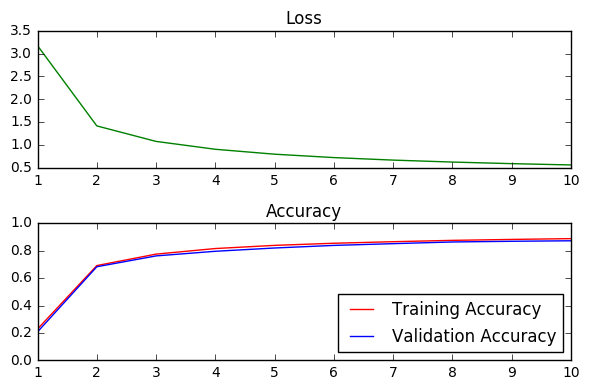

In [12]:
"""
Linear Model - Training/Validation/Testing
"""
# Define test_type for labeling of file
test_type = 'LinearModel'

import tensorflow as tf
import math
from tqdm import tqdm
import datetime

# Define parameters for configuration
epochs = 200
batch_size = 100
learning_rate = 0.01

"""
RESULTS

epoch : batch size : learning rate
200 : 100 : 0.01

Final loss at 0.5424273610115051
Final training accuracy at 0.8926380276679993
Final validation accuracy at 0.8776134252548218
Final test accuracy at 0.7945372462272644
"""

# Set the features and labels tensors
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

# Set the weights and biases tensors
weights = tf.Variable(tf.truncated_normal([features_count,labels_count], mean=0.0, stddev=0.05, dtype=tf.float32, seed=None, name=None))
biases = tf.Variable(tf.zeros([labels_count], tf.float32))

# Feed dicts for training, validation, and test session
train_feed_dict = {features: train_features, labels: train_labels}
valid_feed_dict = {features: valid_features, labels: valid_labels}
test_feed_dict = {features: test_features, labels: test_labels}

# Linear Function WX + b
logits = tf.matmul(features, weights) + biases

# Perform softmax on logits
prediction = tf.nn.softmax(logits)

# Cross entropy. Clip values between 1e-20 and 1.0
cross_entropy = -tf.reduce_sum(labels * tf.log(tf.clip_by_value(prediction,1e-20,1.0)), reduction_indices=1)

# Training loss
loss = tf.reduce_mean(cross_entropy)

# Create an operation that initializes all variables
init = tf.initialize_all_variables()

# Determine if the predictions are correct
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))

# Calculate the accuracy of the predictions
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)    

# The accuracy measured against the validation set
training_accuracy = 0.0
validation_accuracy = 0.0
test_accuracy = 0.0

# Measurements use for graphing loss and accuracy
log_batch_step = 20
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

# Write results to file for troubleshooting
myfile = open(output_filename + test_type + '.txt' , "a") 
myfile.write('\n\n#############################\n')
myfile.write(test_type + ' started ' + str(datetime.datetime.now())+ '\n')
myfile.write('epoch : batch size : learning rate\n')
myfile.write(str(epochs) + ' : ' + str(batch_size) + ' : ' + str(learning_rate) + '\n')
myfile.write('#############################\n\n')

with tf.Session() as session:
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]

            # Run optimizer and get loss
            _, l = session.run(
                [optimizer, loss],
                feed_dict={features: batch_features, labels: batch_labels})


        if not epoch_i % log_batch_step:
            # Check accuracy against Validation data and Test data
            training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
            validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)
            myfile.write('Loss: ' + str(l) + '\n')
            myfile.write('Training Accuracy: ' + str(training_accuracy) + '\n')
            myfile.write('Validation Accuracy: ' + str(validation_accuracy) + '\n')

            # Log batches 1 epoch each time
            previous_batch = batches[-1] if batches else 0
            batches.append( 1 + previous_batch)
            loss_batch.append(l)
            train_acc_batch.append(training_accuracy)
            valid_acc_batch.append(validation_accuracy)
            print('Loss: ' + str(l))
            print('Training Accuracy: ' + str(training_accuracy))
            print('Validation Accuracy: ' + str(validation_accuracy))
    
    training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
    validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)
    test_accuracy = session.run(accuracy, feed_dict=test_feed_dict)

# Write to file final accuracy
myfile.write('Test Accuracy: ' + str(test_accuracy) + '\n')
myfile.write('\n=============================\n')
myfile.write(test_type + ' end ' + str(datetime.datetime.now())+ '\n')
myfile.write('==============================\n')
myfile.close()

# Plot result and save plot as png
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.savefig(output_filename + test_type + '.png')

print('Final loss at {}'.format(l))
print('Final training accuracy at {}'.format(training_accuracy))
print('Final validation accuracy at {}'.format(validation_accuracy))
print('Final test accuracy at {}'.format(test_accuracy))

### Implementing a Deep Neural Network

Implementation of a Deep Neural Network that greatly reduced loss and improved training and validation accuracy!
However, test accuracy was much more muted.


Epoch  2/200:   7%|▋         | 26/373 [00:00<00:01, 253.98batches/s]

Epoch: 0
Loss: 3.50463
Training Accuracy: 0.382947
Validation Accuracy: 0.36563


Epoch 12/200:   7%|▋         | 27/373 [00:00<00:01, 262.97batches/s]

Epoch: 10
Loss: 0.835722
Training Accuracy: 0.790512
Validation Accuracy: 0.773075


Epoch 22/200:   7%|▋         | 27/373 [00:00<00:01, 261.88batches/s]

Epoch: 20
Loss: 0.508867
Training Accuracy: 0.858677
Validation Accuracy: 0.834268


Epoch 32/200:   7%|▋         | 27/373 [00:00<00:01, 262.59batches/s]

Epoch: 30
Loss: 0.35645
Training Accuracy: 0.895887
Validation Accuracy: 0.863335


Epoch 42/200:   7%|▋         | 27/373 [00:00<00:01, 261.51batches/s]

Epoch: 40
Loss: 0.26045
Training Accuracy: 0.92115
Validation Accuracy: 0.882713


Epoch 52/200:   7%|▋         | 27/373 [00:00<00:01, 262.76batches/s]

Epoch: 50
Loss: 0.199169
Training Accuracy: 0.94056
Validation Accuracy: 0.893422


Epoch 62/200:   7%|▋         | 26/373 [00:00<00:01, 259.68batches/s]

Epoch: 60
Loss: 0.15616
Training Accuracy: 0.953071
Validation Accuracy: 0.904131


Epoch 72/200:   7%|▋         | 27/373 [00:00<00:01, 261.03batches/s]

Epoch: 70
Loss: 0.126688
Training Accuracy: 0.963246
Validation Accuracy: 0.91076


Epoch 82/200:   7%|▋         | 27/373 [00:00<00:01, 265.25batches/s]

Epoch: 80
Loss: 0.10512
Training Accuracy: 0.969743
Validation Accuracy: 0.914329


Epoch 92/200:   7%|▋         | 27/373 [00:00<00:01, 263.04batches/s]

Epoch: 90
Loss: 0.0882265
Training Accuracy: 0.975032
Validation Accuracy: 0.917389


Epoch 102/200:   7%|▋         | 26/373 [00:00<00:01, 259.46batches/s]

Epoch: 100
Loss: 0.0772397
Training Accuracy: 0.979622
Validation Accuracy: 0.921978


Epoch 112/200:   7%|▋         | 27/373 [00:00<00:01, 262.43batches/s]

Epoch: 110
Loss: 0.0681711
Training Accuracy: 0.982898
Validation Accuracy: 0.925548


Epoch 122/200:   7%|▋         | 26/373 [00:00<00:01, 258.68batches/s]

Epoch: 120
Loss: 0.0608967
Training Accuracy: 0.985851
Validation Accuracy: 0.931158


Epoch 132/200:   7%|▋         | 27/373 [00:00<00:01, 263.00batches/s]

Epoch: 130
Loss: 0.0557069
Training Accuracy: 0.988133
Validation Accuracy: 0.933197


Epoch 142/200:   7%|▋         | 27/373 [00:00<00:01, 261.54batches/s]

Epoch: 140
Loss: 0.050939
Training Accuracy: 0.990039
Validation Accuracy: 0.935237


Epoch 152/200:   7%|▋         | 27/373 [00:00<00:01, 259.85batches/s]

Epoch: 150
Loss: 0.0467021
Training Accuracy: 0.991569
Validation Accuracy: 0.937277


Epoch 162/200:   7%|▋         | 27/373 [00:00<00:01, 262.83batches/s]

Epoch: 160
Loss: 0.043447
Training Accuracy: 0.992777
Validation Accuracy: 0.938297


Epoch 172/200:   7%|▋         | 26/373 [00:00<00:01, 259.93batches/s]

Epoch: 170
Loss: 0.0404212
Training Accuracy: 0.993932
Validation Accuracy: 0.939317


Epoch 182/200:   7%|▋         | 27/373 [00:00<00:01, 262.58batches/s]

Epoch: 180
Loss: 0.0375032
Training Accuracy: 0.994684
Validation Accuracy: 0.940337


Epoch 192/200:   7%|▋         | 27/373 [00:00<00:01, 261.72batches/s]

Epoch: 190
Loss: 0.0351544
Training Accuracy: 0.99565
Validation Accuracy: 0.941356


Epoch 200/200: 100%|██████████| 373/373 [00:01<00:00, 262.73batches/s]


Final loss at 0.03318308666348457
Final training accuracy at 0.9961869716644287
Final validation accuracy at 0.942886233329773
Final test accuracy at 0.7983376979827881


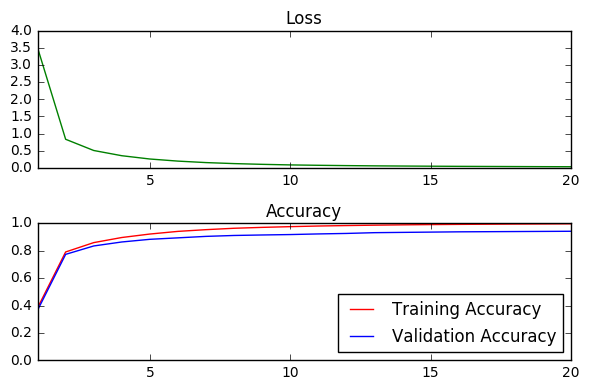

In [11]:
"""
Deep Neural Network - Training/Validation/Testing
"""

# Define test_type for labeling of file
test_type = 'DeepNeuralNetworkWithReduction'

import tensorflow as tf
import math
from tqdm import tqdm
import datetime

# Parameters to tuning
epochs = 200
batch_size = 100
learning_rate = 0.001
n_hidden_layer = 1024
keep = 1.0


"""
RESULT

epoch : batch size : learning rate : hidden layer : keep
200 : 100 : 0.001 : 1024 : 1.0

Final loss at 0.03318308666348457
Final training accuracy at 0.9961869716644287
Final validation accuracy at 0.942886233329773
Final test accuracy at 0.7983376979827881
"""

# Set the features and labels tensors
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

# Set the weights and biases tensors
weights = {
    'hidden_layer': tf.Variable(tf.truncated_normal([features_count,n_hidden_layer], mean=0.0, stddev=0.05, dtype=tf.float32, seed=None, name=None)),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, labels_count]))
}
biases = {
    'hidden_layer': tf.Variable(tf.zeros([n_hidden_layer], tf.float32)),
    'out': tf.Variable(tf.zeros([labels_count], tf.float32))
}

# Implementation of dropouts: Probability to keep units
keep_prob = tf.placeholder(tf.float32) 

# Feed dicts for training, validation, and test session
train_feed_dict = {features: train_features, labels: train_labels, keep_prob: 1.0}
valid_feed_dict = {features: valid_features, labels: valid_labels, keep_prob: 1.0}
test_feed_dict = {features: test_features, labels: test_labels, keep_prob: 1.0}

# Linear Function WX + b
layer_1 = tf.add(tf.matmul(features, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)
layer_1 = tf.nn.dropout(layer_1, keep_prob)

# Output layer with linear activation
logits = tf.matmul(layer_1, weights['out']) + biases['out']

prediction = tf.nn.softmax(logits)

# Cross entropy
cross_entropy = -tf.reduce_sum(labels * tf.log(tf.clip_by_value(prediction,1e-20,1.0)), reduction_indices=1)

# Training loss
loss = tf.reduce_mean(cross_entropy)

# Create an operation that initializes all variables
init = tf.initialize_all_variables()

# Determine if the predictions are correct
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))

# Calculate the accuracy of the predictions
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)    

# The accuracy measured against the validation set
training_accuracy = 0.0
validation_accuracy = 0.0
test_accuracy = 0.0

# Measurements use for graphing loss and accuracy
log_batch_step = 10
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

# Write data to file
myfile = open(output_filename + test_type + '.txt' , "a") 
myfile.write('\n\n#############################\n')
myfile.write(test_type + ' started ' + str(datetime.datetime.now())+ '\n')
myfile.write('epoch : batch size : learning rate : hidden layer : keep\n')
myfile.write(str(epochs) + ' : ' + str(batch_size) + ' : ' + str(learning_rate) + ' : ' + str(n_hidden_layer) + ' : ' + str(keep) + '\n')
myfile.write('#############################\n\n')

with tf.Session() as session:
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]

            # Run optimizer and get loss
            _, l = session.run(
                [optimizer, loss],
                feed_dict={features: batch_features, labels: batch_labels, keep_prob: keep})


        if not epoch_i % log_batch_step:
            # Check accuracy against Validation data and Test data
            training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
            validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)
            myfile.write('Epoch: ' + str(epoch_i) + '\n')
            myfile.write('Loss: ' + str(l) + '\n')
            myfile.write('Training Accuracy: ' + str(training_accuracy) + '\n')
            myfile.write('Validation Accuracy: ' + str(validation_accuracy) + '\n')

            # Log batches 1 epoch each time
            previous_batch = batches[-1] if batches else 0
            batches.append( 1 + previous_batch)
            loss_batch.append(l)
            train_acc_batch.append(training_accuracy)
            valid_acc_batch.append(validation_accuracy)
            print('Epoch: ' + str(epoch_i))
            print('Loss: ' + str(l))
            print('Training Accuracy: ' + str(training_accuracy))
            print('Validation Accuracy: ' + str(validation_accuracy))
    
    training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
    validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)
    test_accuracy = session.run(accuracy, feed_dict=test_feed_dict)    

myfile.write('Test Accuracy: ' + str(test_accuracy) + '\n')
myfile.write('\n=============================\n')
myfile.write(test_type + ' end ' + str(datetime.datetime.now())+ '\n')
myfile.write('==============================\n')
myfile.close()

loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.savefig(output_filename + test_type + '.png')

print('Final loss at {}'.format(l))
print('Final training accuracy at {}'.format(training_accuracy))
print('Final validation accuracy at {}'.format(validation_accuracy))
print('Final test accuracy at {}'.format(test_accuracy))


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

To set up training and testing data for model, the original training data was randomly split using train_test_split
while reserving 5% of training data as validation data. Test data was kept as it is for testing.

From the vertical bar chart plotted earlier, we can notice there were significantly less data provide for images
such as "Roundabout mandatory", "End of no passing" and "End of no passing by vechiles over 3.5 metric tons" 
compared to "Speed limit (30km/h)" and "Speed limit (50km/h)". Therefore jittering was performed to avoid the having
the neural network becoming bias towards signs that contains bigger data set. Approximately equal number of jittered 
signs were generated for each road sign to balance the data.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

1. The final architecture is a Convolution Neural Network with 2 layers of Convolution Network with depth 64 (1st layer) and 128 (2nd layer), and 2 Fully Connected layer of 1024 and 43.

2. In the Convolution Network layer, the process will alternate between Convolution(), valid padding -> Max Pooling() -> Convolution(), valid padding -> Max Pooling().


### Implementing a Convolution Neural Network

Implementation of a Convolution Neural Network that greatly reduced loss, improved training, validation and test accuracy!


Epoch  2/200:   1%|          | 4/373 [00:00<00:11, 30.97batches/s]

Epoch: 0
Loss: 3.4538
Training Accuracy: 0.152429
Validation Accuracy: 0.148394


Epoch 12/200:   1%|          | 4/373 [00:00<00:11, 31.18batches/s]

Epoch: 10
Loss: 1.75961
Training Accuracy: 0.592
Validation Accuracy: 0.569607


Epoch 22/200:   1%|          | 4/373 [00:00<00:11, 31.18batches/s]

Epoch: 20
Loss: 1.03142
Training Accuracy: 0.786857
Validation Accuracy: 0.767466


Epoch 32/200:   1%|          | 4/373 [00:00<00:11, 31.20batches/s]

Epoch: 30
Loss: 0.704278
Training Accuracy: 0.854857
Validation Accuracy: 0.847017


Epoch 42/200:   1%|          | 4/373 [00:00<00:11, 31.15batches/s]

Epoch: 40
Loss: 0.530316
Training Accuracy: 0.891857
Validation Accuracy: 0.887302


Epoch 52/200:   1%|          | 4/373 [00:00<00:11, 31.01batches/s]

Epoch: 50
Loss: 0.422169
Training Accuracy: 0.915857
Validation Accuracy: 0.90464


Epoch 62/200:   1%|          | 4/373 [00:00<00:11, 31.25batches/s]

Epoch: 60
Loss: 0.347413
Training Accuracy: 0.930143
Validation Accuracy: 0.919429


Epoch 72/200:   1%|          | 4/373 [00:00<00:11, 31.32batches/s]

Epoch: 70
Loss: 0.292443
Training Accuracy: 0.942286
Validation Accuracy: 0.929628


Epoch 82/200:   1%|          | 4/373 [00:00<00:11, 31.22batches/s]

Epoch: 80
Loss: 0.250021
Training Accuracy: 0.951572
Validation Accuracy: 0.936257


Epoch 92/200:   1%|          | 4/373 [00:00<00:11, 31.15batches/s]

Epoch: 90
Loss: 0.216388
Training Accuracy: 0.957
Validation Accuracy: 0.942886


Epoch 102/200:   1%|          | 4/373 [00:00<00:11, 31.26batches/s]

Epoch: 100
Loss: 0.188965
Training Accuracy: 0.961286
Validation Accuracy: 0.949516


Epoch 112/200:   1%|          | 4/373 [00:00<00:11, 31.29batches/s]

Epoch: 110
Loss: 0.166338
Training Accuracy: 0.966286
Validation Accuracy: 0.951555


Epoch 122/200:   1%|          | 4/373 [00:00<00:11, 31.18batches/s]

Epoch: 120
Loss: 0.147364
Training Accuracy: 0.97
Validation Accuracy: 0.954615


Epoch 132/200:   1%|          | 4/373 [00:00<00:11, 31.23batches/s]

Epoch: 130
Loss: 0.131309
Training Accuracy: 0.973286
Validation Accuracy: 0.957675


Epoch 142/200:   1%|          | 4/373 [00:00<00:11, 31.25batches/s]

Epoch: 140
Loss: 0.117606
Training Accuracy: 0.976143
Validation Accuracy: 0.961244


Epoch 152/200:   1%|          | 4/373 [00:00<00:11, 31.14batches/s]

Epoch: 150
Loss: 0.105815
Training Accuracy: 0.978429
Validation Accuracy: 0.962264


Epoch 162/200:   1%|          | 4/373 [00:00<00:11, 31.18batches/s]

Epoch: 160
Loss: 0.0956792
Training Accuracy: 0.979715
Validation Accuracy: 0.966344


Epoch 172/200:   1%|          | 4/373 [00:00<00:11, 31.18batches/s]

Epoch: 170
Loss: 0.0868663
Training Accuracy: 0.981572
Validation Accuracy: 0.970423


Epoch 182/200:   1%|          | 4/373 [00:00<00:11, 31.20batches/s]

Epoch: 180
Loss: 0.0792044
Training Accuracy: 0.983857
Validation Accuracy: 0.973993


Epoch 192/200:   1%|          | 4/373 [00:00<00:11, 31.15batches/s]

Epoch: 190
Loss: 0.0725082
Training Accuracy: 0.984857
Validation Accuracy: 0.975523


Epoch 200/200: 100%|██████████| 373/373 [00:11<00:00, 31.21batches/s]


Model saved in file: tmp/model.ckpt
Final loss at 0.06720919162034988
Final training accuracy at 0.9852859973907471
Final validation accuracy at 0.9770524501800537
Final test accuracy (Set 1) at 0.9137145280838013
Final test accuracy (Set 2) at 0.9131439328193665


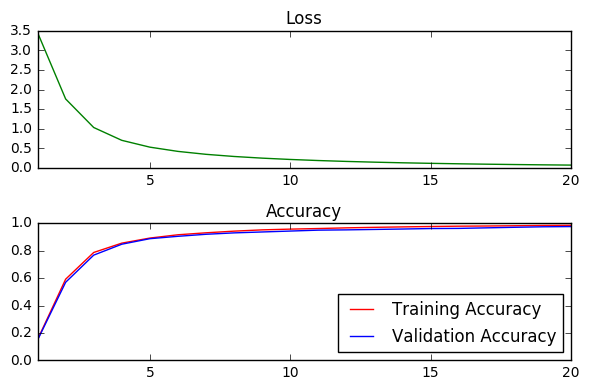

In [7]:
"""
Convolution Neural Network - Training/Validation/Testing


RESULT
epoch : batch size : learning rate : CN Layer 1 : CN Layer 2 : FC Layer 1 : FC Layer 2
200   : 100        : 0.001         : 64         : 128        : 1024       : 43

Final loss at 0.06720919162034988
Final training accuracy at 0.9852859973907471
Final validation accuracy at 0.9770524501800537
Final test accuracy (Set 1) at 0.9137145280838013
Final test accuracy (Set 2) at 0.9131439328193665

"""

# Define test_type for labeling of file
test_type = 'ConvDeepNeuralNetworkWithReduction'

import signal
import tensorflow as tf
import math
from tqdm import tqdm
import datetime
from tensorflow.contrib.layers import flatten

def conv_net(x):
    
    x = tf.reshape(x, (-1, 32, 32, 1))
    
    # 28x28x64
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 64), mean=0.0, stddev=0.05, dtype=tf.float32, seed=None, name=None), name='conv1_W')
    conv1_b = tf.Variable(tf.zeros(64), name='conv1_b')
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    conv1 = tf.nn.tanh(conv1)

    # 14x14x64
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # 10x10x128
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 64, 128), mean=0.0, stddev=0.05, dtype=tf.float32, seed=None, name=None),name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(128), name='conv2_b')
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    conv2 = tf.nn.tanh(conv2)

    # 5x5x128
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten
    fc1 = flatten(conv2)
    # (5 * 5 * 16, 120)
    fc1_shape = (fc1.get_shape().as_list()[-1], 1024)

    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc1_shape), mean=0.0, stddev=0.05, dtype=tf.float32, seed=None, name=None), name='fc1_W')
    fc1_b = tf.Variable(tf.zeros(1024), name='fc1_b')
    fc1 = tf.matmul(fc1, fc1_W) + fc1_b
    fc1 = tf.nn.tanh(fc1)

    fc2_W = tf.Variable(tf.truncated_normal(shape=(1024, 43), mean=0.0, stddev=0.05, dtype=tf.float32, seed=None, name=None), name='fc2_W')
    fc2_b = tf.Variable(tf.zeros(43), name='fc2_b')
    return tf.matmul(fc1, fc2_W) + fc2_b

# For kernal interruption and saving data
def exit_gracefully(frame, signal):
    myfile.write('\n=============================\n')
    myfile.write(test_type + ' end ' + str(datetime.datetime.now())+ '\n')
    myfile.write('==============================\n')
    
    myfile.close()
    
    loss_plot = plt.subplot(211)
    loss_plot.set_title('Loss')
    loss_plot.plot(batches, loss_batch, 'g')
    loss_plot.set_xlim([batches[0], batches[-1]])
    acc_plot = plt.subplot(212)
    acc_plot.set_title('Accuracy')
    acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
    acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
    acc_plot.set_ylim([0, 1.0])
    acc_plot.set_xlim([batches[0], batches[-1]])
    acc_plot.legend(loc=4)
    plt.tight_layout()
    plt.savefig(output_filename + test_type + '.png')    


# Find the best parameters for each configuration
epochs = 200
batch_size = 100
learning_rate = 0.001
keep = 1.0

# Set the features and labels tensors
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32, shape = [None, labels_count])

# probability to keep units
keep_prob = tf.placeholder(tf.float32) 

# Feed dicts for training, validation, and test session
# Reduce train_feed_dict size to fit into memory
train_feed_dict = {features: train_features[0:7000], labels: train_labels[0:7000], keep_prob: 1.0}
valid_feed_dict = {features: valid_features, labels: valid_labels, keep_prob: 1.0}
test_feed_dict1 = {features: test_features[0:7000], labels: test_labels[0:7000], keep_prob: 1.0}
test_feed_dict2 = {features: test_features[7000:12630], labels: test_labels[7000:12630], keep_prob: 1.0}

logits = conv_net(features)

prediction = tf.nn.softmax(logits)

# Cross entropy
cross_entropy = -tf.reduce_sum(labels * tf.log(tf.clip_by_value(prediction,1e-20,1.0)), reduction_indices=1)

# Training loss
loss = tf.reduce_mean(cross_entropy)

# Create an operation that initializes all variables
init = tf.initialize_all_variables()

# Determine if the predictions are correct
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))

# Calculate the accuracy of the predictions
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)    

# The accuracy measured against the validation set
training_accuracy = 0.0
validation_accuracy = 0.0
test_accuracy = 0.0

# Measurements use for graphing loss and accuracy
log_batch_step = 10
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []  

signal.signal(signal.SIGINT, exit_gracefully)
myfile = open(output_filename + test_type + '.txt' , "a") 

myfile.write('\n\n#############################\n')
myfile.write(test_type + ' started ' + str(datetime.datetime.now())+ '\n')
myfile.write('epoch : batch size : learning rate : hidden layer : keep\n')
myfile.write(str(epochs) + ' : ' + str(batch_size) + ' : ' + str(learning_rate) + ' : ' + str(512) + ' : ' + str(keep) + '\n')
myfile.write('#############################\n\n')

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

with tf.Session() as session:
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]

            # Run optimizer and get loss
            _, l = session.run(
                [optimizer, loss],
                feed_dict={features: batch_features, labels: batch_labels, keep_prob: keep})


        if not epoch_i % log_batch_step:
            # Check accuracy against Validation data and Test data
            training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
            validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)
            myfile.write('Epoch: ' + str(epoch_i) + '\n')
            myfile.write('Loss: ' + str(l) + '\n')
            myfile.write('Training Accuracy: ' + str(training_accuracy) + '\n')
            myfile.write('Validation Accuracy: ' + str(validation_accuracy) + '\n')

            # Log batches 1 epoch each time
            previous_batch = batches[-1] if batches else 0
            batches.append( 1 + previous_batch)
            loss_batch.append(l)
            train_acc_batch.append(training_accuracy)
            valid_acc_batch.append(validation_accuracy)
            print('Epoch: ' + str(epoch_i))
            print('Loss: ' + str(l))
            print('Training Accuracy: ' + str(training_accuracy))
            print('Validation Accuracy: ' + str(validation_accuracy))
    
    training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
    validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)
    test_accuracy1 = session.run(accuracy, feed_dict=test_feed_dict1)
    test_accuracy2 = session.run(accuracy, feed_dict=test_feed_dict2)    
    
    # Save the variables to disk.
    save_path = saver.save(session, "tmp/model.ckpt")
    print("Model saved in file: %s" % save_path)

myfile.write('Test Accuracy 1: ' + str(test_accuracy1) + '\n')
myfile.write('Test Accuracy 2: ' + str(test_accuracy2) + '\n')

myfile.write('\n=============================\n')
myfile.write(test_type + ' end ' + str(datetime.datetime.now())+ '\n')
myfile.write('==============================\n')

myfile.close()

loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.savefig(output_filename + test_type + '.png')


print('Final loss at {}'.format(l))
print('Final training accuracy at {}'.format(training_accuracy))
print('Final validation accuracy at {}'.format(validation_accuracy))
print('Final test accuracy (Set 1) at {}'.format(test_accuracy1))
print('Final test accuracy (Set 2) at {}'.format(test_accuracy2))


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**


Training was done in small subsets of training features starting from 100->1000->10000->Full Training Set. Training was done in such a way such that if there are any modelling errors, the error can be caught and caught fast. Painful lesson was also learned from failing to restrict stddev of truncated normal weights. Normal weights that were not trucated resulted large losses being unable to converge and hence much time was loss but lessons learned in this episode as well.

Gradient Descent Optimizer was found to be adequate in Project 2 in reducing loss.

Through testing from small batches of 100 to full training set, the following paremeter were selected by trial and error for its speed at which loss was able to converge.

epochs = 200 (selected for its ability to improve training accuracy. Allowed training to continue as long as there were significant improvements of at least 30 new accurate predictions)

batch_size = 100 (Optimum number without much jitter in the loss graph 

learning_rate = 0.001 (Learning rate wasa reduced from the initial 0.01 as loss was unable to converge with learning rate of 0.01)

keep = 1.0 (Dropout was left at 1.0 as there was no noticeable overfitting from the plot on the validation set)



### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**


Being new to Deep Learning, the approach taken was a gradual one where experiment first started from a Linear Network, to a Deep Neural Network and finally a Convoluted Neural Network for dealing with the images.

Training size was also increased gradually in order to quickly troubleshoot any issues with the modelling at small training size where training time would be short.

CNN was chosen as the final model as the same epoch of 200 gave the best result among the 3 models tested.

Jittering of images can also be seen from the codes above where random translation between [-2,2] and rotation between [-15,15] were generated to even out any biaes due to some labels having a larger bank of image.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**
The poor contrast of the keep right image and the small speed limit (50km/h) sign might prove challenging for the model.

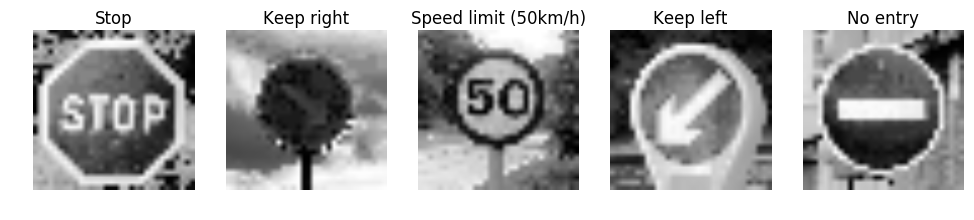

Result of prediction
[ True False False  True  True]
Test accuracy for the 5 cases is at 0.6000000238418579


In [9]:
### Train your model here.
### Feel free to use as many code cells as needed.

import os
import csv

ifile  = open('signnames.csv', "r")
reader = csv.reader(ifile)
reader = list(reader)

signnames = []
for row in reader:
    if row[0] != 'ClassId':
        signnames.append(row[1])
        
ifile.close()

path = "Road Signs/"  

test_features_new = []
test_labels_index = []

listing = os.listdir(path)    
for file in listing:
    img = cv2.imread(path + file) 
    img = cv2.resize(img, (32,32))
    test_features_new.append(normalize_greyscale(img))
    test_labels_index.append(int(file[0:-4]))

# Display images in a 11 x 4 plot
fig = plt.figure(figsize=(12, 35))

for i in range(len(test_features_new)):
    fig.add_subplot(1, 5, i+1)
    plt.imshow(test_features_new[i], cmap = 'gray')
    plt.title(signnames[test_labels_index[i]])
    plt.axis('off')

plt.show()

test_labels_new = encoder.transform(test_labels_index)

test_feed_dict_new = {features: test_features_new, labels: test_labels_new, keep_prob: 1.0}

with tf.Session() as session:

    #session.run(init)
    #Restore variables from disk.
    saver.restore(session, "tmp/model.ckpt")
    #print("Model restored.")

    test_accuracy_new = session.run(accuracy, feed_dict=test_feed_dict_new)
    
    print('Result of prediction')
    print(session.run(is_correct_prediction, feed_dict=test_feed_dict_new))
    print('Test accuracy for the 5 cases is at {}'.format(test_accuracy_new))

print('Done')


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

The CNN model achieved the following results when tested on the dataset where the model was able to achieve 97.7% accuracy on the validation set (1961 images or 5% of training set) and 91.3% accuracy on the test set (12630 images) that it had not seen before.

Final loss at 0.06720919162034988

Final training accuracy at 0.9852859973907471

Final validation accuracy at 0.9770524501800537

Final test accuracy (Set 1) at 0.9137145280838013

Final test accuracy (Set 2) at 0.9131439328193665

However, the model was not able to perform just as well on captured images as it had only achieved 60% accuracy in the small test set of 5 cases.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

The CNN is uncertain of "Keep Right" and "Speed limit (50km/h)" sign.

The results for these 2 signs are as follows

Type of sign:Keep right
Prediction (Ranked):
1. Yield 0.27
2. Turn left ahead 0.19
3. Priority road 0.11
4. Keep right 0.09
5. Bumpy road 0.08

Type of sign:Speed limit (50km/h)
Prediction (Ranked):
1. Speed limit (20km/h) 0.52
2. Roundabout mandatory 0.15
3. Priority road 0.14
4. Go straight or left 0.08
5. General caution 0.03

It was interesting to observe that instead yield sign (27%) was ranked top for keep right, while Speed limit (20km/h) (52%) was ranked top for Speed limit (50km/h). 

For the Keep Right sign, the correct sign was ranked 4th (9%) while for the Speed limit (50km/h) sign, the correct sign was not found in the top 5.

The reason for failure of these 2 signs could like be due to the low contrast in the Keep Right sign and similarity of Speed limit (20km/h) to Speed limit (50km/h) sign.


In [11]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

top_prediction = tf.nn.top_k(prediction, k=5, sorted = True)

with tf.Session() as session:

    #Restore variables from disk.
    saver.restore(session, "tmp/model.ckpt")
    print("Model restored.")

    prediction_store = session.run(top_prediction, feed_dict=test_feed_dict_new)
    
for i in range(5):
    print('Type of sign:' + str(signnames[test_labels_index[i]]))
    print('Prediction (Ranked):')
    for k in range(5):
        print(str(k+1) + '. ' + signnames[prediction_store[1][i][k]] + ' ' + str(round(prediction_store[0][i][k], 2)))
    print()
    



Model restored.
Type of sign:Stop
Prediction (Ranked):
1. Stop 0.99
2. No entry 0.0
3. No vechiles 0.0
4. Speed limit (30km/h) 0.0
5. Bumpy road 0.0

Type of sign:Keep right
Prediction (Ranked):
1. Yield 0.27
2. Turn left ahead 0.19
3. Priority road 0.11
4. Keep right 0.09
5. Bumpy road 0.08

Type of sign:Speed limit (50km/h)
Prediction (Ranked):
1. Speed limit (20km/h) 0.52
2. Roundabout mandatory 0.15
3. Priority road 0.14
4. Go straight or left 0.08
5. General caution 0.03

Type of sign:Keep left
Prediction (Ranked):
1. Keep left 0.99
2. Turn right ahead 0.0
3. Speed limit (50km/h) 0.0
4. Speed limit (70km/h) 0.0
5. No vechiles 0.0

Type of sign:No entry
Prediction (Ranked):
1. No entry 0.99
2. Stop 0.01
3. No vechiles 0.0
4. Turn left ahead 0.0
5. Turn right ahead 0.0



### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

Interface was built to save the weights from CNN (saver = tf.train.Saver()) and reapplying them to the 5 newly acquired image. Simple file reading of signnames.csv and extracting of images/filenames from folder was then used to display and label the files.